# Syed Shaf Shah
# *FA22-BBD-039*


Importing neccesary libraries

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [125]:
# Importing the dataset
df = pd.read_csv(r"C:\5th semester\Machine Learning\ifood_df_raw.csv")

## **Section 1: Data Analysis and Preprocessing**

In [126]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

#### Removing extra spacing from column *Income*

In [128]:
df.columns = df.columns.str.strip()

#### Removing '*$*' and '*,*' from column *Income*, so that we can convert the colmumn to numderic data type

In [129]:
df["Income"] = df["Income"].str.replace('$','',regex=False)
df['Income'] = df['Income'].str.replace(',','', regex=False)
df['Income'] = df['Income'].str.strip()
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')  

In [130]:
df['Income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
2216 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


#### Finding null values in the dataframe

In [132]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

#### Since there are only 24 null values, which constitute just *1%* of the data, we can safely remove these values without any significant impact.

In [133]:
df.dropna(inplace = True)

In [134]:
df.shape

(2216, 28)

### Removing outliers using *IQR(Interquartile range)*
The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Outliers are typically defined as values that lie below 𝑄 1 − 1.5 × IQR Q1−1.5×IQR or above 𝑄 3 + 1.5 × IQR Q3+1.5×IQR. This method helps to clean the dataset by removing extreme values that may skew analysis.


In [135]:
import pandas as pd
import numpy as np
from scipy import stats

def remove_outliers_iqr(df, columns):
    df_no_outliers = df.copy()
    for col in columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    return df_no_outliers

columns = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
           'NumStorePurchases', 'NumWebVisitsMonth']

df_no_outliers = remove_outliers_iqr(df, columns)

print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape After Removing Outliers:", df_no_outliers.shape)


Original DataFrame Shape: (2216, 28)
DataFrame Shape After Removing Outliers: (974, 28)


### **Validity of Outlier Removal**
**By removing outliers using the IQR method, the dataframe was reduced by approximately 56%. This indicates that the data is naturally skewed, and excluding outliers could invalidate our analysis. Therefore, we should consider the impact of outliers on our analysis before proceeding.**

#### Finding unique values in Dataframe


In [136]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [137]:
#  Variable Age in replacement of the variable Year_birth
df["Age"] = 2024 - df["Year_Birth"]

In [138]:
df["Age"]

0       54
1       63
2       66
3       57
4       35
        ..
2235    48
2236    47
2237    48
2238    46
2239    55
Name: Age, Length: 2216, dtype: int64

In [139]:
#  Variable Revenue_generated as the total sum of the amount spent on the 6 product categories
df["Revenue_generated"]= df[['MntWines','MntFruits', 'MntMeatProducts', 
                            'MntFishProducts','MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [140]:
df["Revenue_generated"]

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Revenue_generated, Length: 2216, dtype: int64

In [141]:
#  Variable Total_Purchases by adding all the purchases features
df["Total_Purchases"] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                            'NumStorePurchases']].sum(axis=1)

In [142]:
df["Total_Purchases"]

0       15
1       18
2       11
3        4
4        8
        ..
2235    20
2236     5
2237    14
2238    20
2239    18
Name: Total_Purchases, Length: 2216, dtype: int64

In [143]:
#  Variable TotalAmount_Spent for each customer by adding all the Mnt* features
df['TotalAmount_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                              'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [144]:
df['TotalAmount_Spent']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: TotalAmount_Spent, Length: 2216, dtype: int64

In [145]:
# Family variable as the sum of Kidhome + Teenhome + Marital_Status
# Marital_Status can be imputed as {'Divorced':1, 'Single':1, 'Married':2, 
# 'Together':2, 'Widow':1, 'YOLO':1, 'Alone':1, 'Absurd':1} 
marital_status_map = {
    'Divorced': 1,
    'Single': 1,
    'Married': 2,
    'Together': 2,
    'Widow': 1,
    'YOLO': 1,
    'Alone': 1,
    'Absurd': 1
}
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status'].map(marital_status_map)


In [146]:
df['Family_Size'] 

0       1
1       1
2       3
3       4
4       2
       ..
2235    2
2236    3
2237    2
2238    2
2239    4
Name: Family_Size, Length: 2216, dtype: int64

In [147]:
#  TotalCampaignsAcc as the total acceptance of advertising campaigns
df['TotalCampaignsAcc'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                  'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [148]:
df['TotalCampaignsAcc']

0       0
1       1
2       0
3       0
4       1
       ..
2235    0
2236    0
2237    0
2238    0
2239    2
Name: TotalCampaignsAcc, Length: 2216, dtype: int64

In [149]:
# Variable Educationnal_years as the total number of years of education the individual achieved according to its diploma
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [150]:
education_years_map = {
    'Basic': 9,
    '2n Cycle': 12,
    'Graduation': 16,
    'Master': 18,
    'PhD': 22
}
df["Educationnal_years"] = df['Education'].map(education_years_map)

In [151]:
df["Educationnal_years"]

0       16
1       16
2       16
3       16
4       16
        ..
2235    22
2236    12
2237    16
2238    16
2239    22
Name: Educationnal_years, Length: 2216, dtype: int64

## **Section 02: Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

####  Descriptive statistics

In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


#### Histograms

Text(0.5, 1.0, 'Total Revnue generated distribution ')

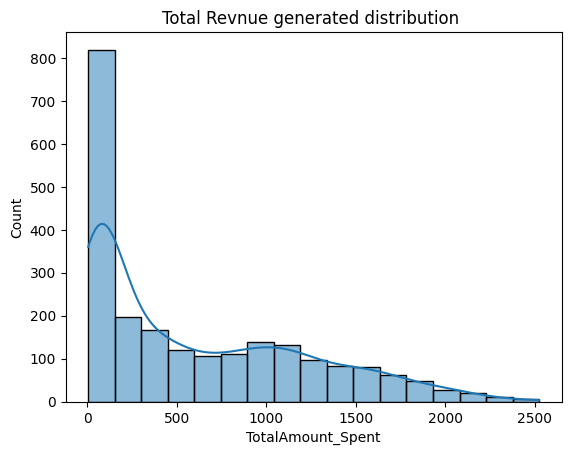

In [153]:
sns.histplot(df, x='TotalAmount_Spent',kde= True)
plt.title('Total Revnue generated distribution ')

Text(0.5, 1.0, 'Total Purchases distribution')

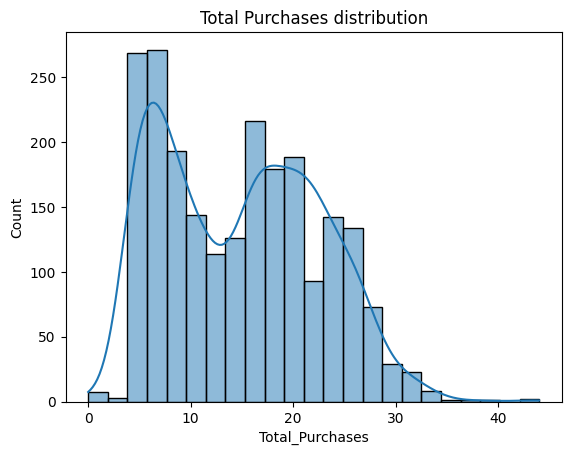

In [154]:
sns.histplot(df, x='Total_Purchases',kde= True)
plt.title('Total Purchases distribution')

(0.0, 200000.0)

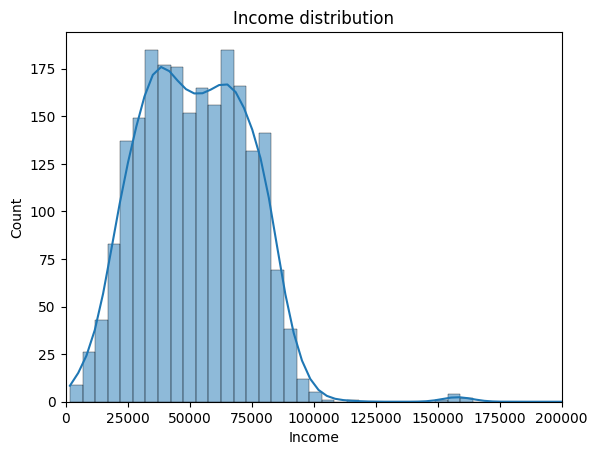

In [155]:
sns.histplot(df, x='Income',kde= True)
plt.title('Income distribution')
plt.xlim(0, 200000)

#### Boxplots

<Axes: xlabel='Age'>

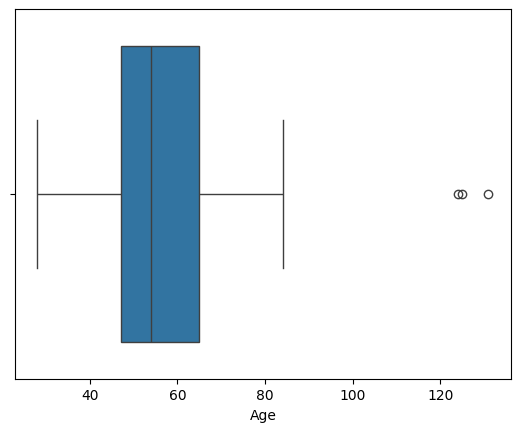

In [156]:
sns.boxplot(x=df["Age"])

<Axes: xlabel='Income'>

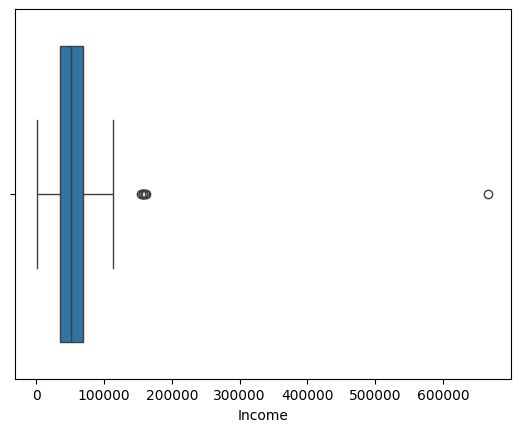

In [157]:
sns.boxplot(x=df["Income"])

### **Bivariate Analysis**

#### Scatter plot

(0.0, 200000.0)

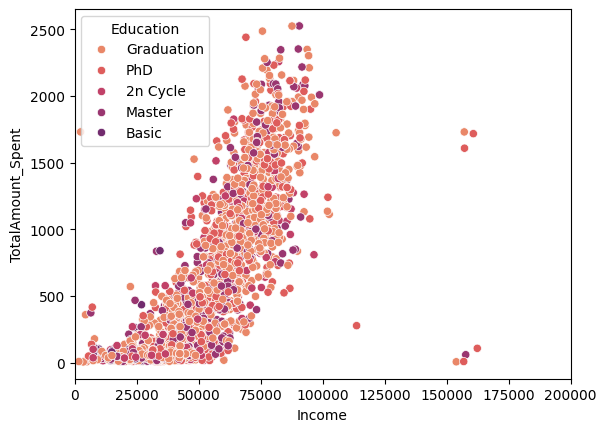

In [158]:
sns.scatterplot(df, x = 'Income', y = 'TotalAmount_Spent', hue='Education', palette= 'flare')
plt.xlim(0, 200000)

<Axes: xlabel='Family_Size', ylabel='Income'>

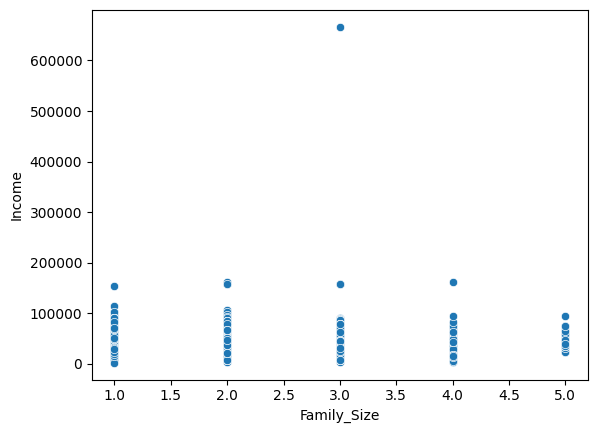

In [159]:
sns.scatterplot(df, x = 'Family_Size', y = 'Income')

####  Correlation analysis 

<Axes: >

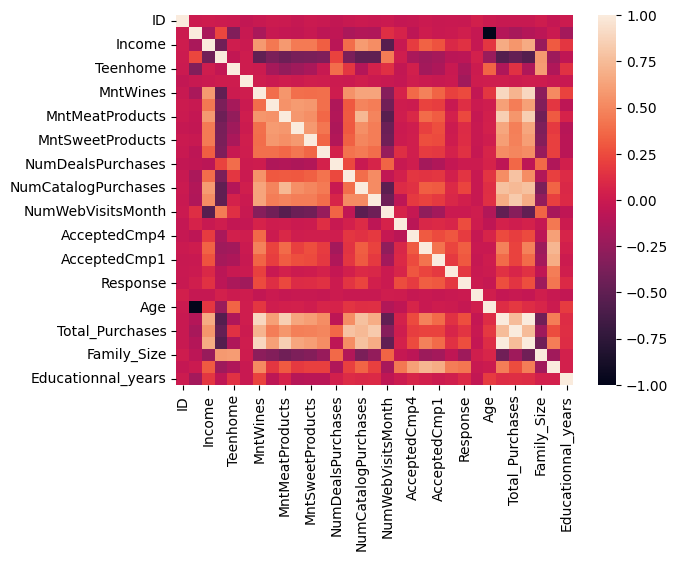

In [160]:
sns.heatmap(df.corr(numeric_only = True))

## **Section 03: Data Visualization**

**Which marketing campaign is most successful?**

Text(0.5, 1.0, 'Accepted offers in each campaign')

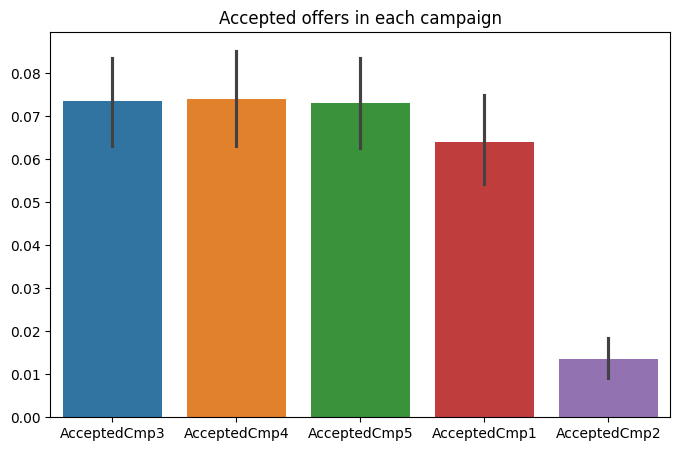

In [166]:
plt.figure(figsize = (8,5))
sns.barplot(df[[ 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']])
plt.title("Accepted offers in each campaign")

**Display the total amount spent by a customer in each product category**

Text(0.5, 1.0, 'Total amount spent by a customer in each product category')

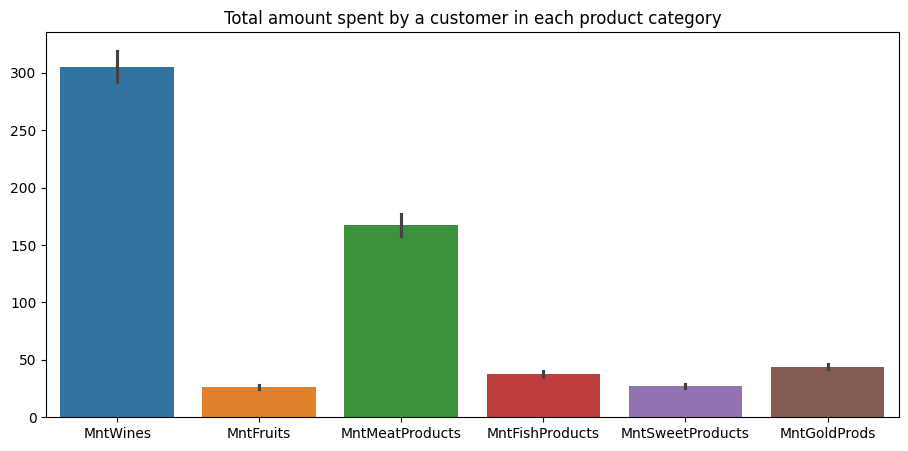

In [167]:
plt.figure(figsize = (11,5))
sns.barplot(df[[ 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']])
plt.title("Total amount spent by a customer in each product category")

**What is the average spending in each age group?**

C:\Users\DELL\AppData\Local\Temp\ipykernel_15364\2074756165.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(df.groupby('Age_Group')['TotalAmount_Spent'].mean(), palette= 'Set1')
C:\Users\DELL\AppData\Local\Temp\ipykernel_15364\2074756165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df.groupby('Age_Group')['TotalAmount_Spent'].mean(), palette= 'Set1')


Text(0.5, 1.0, 'Average spending in each age group?')

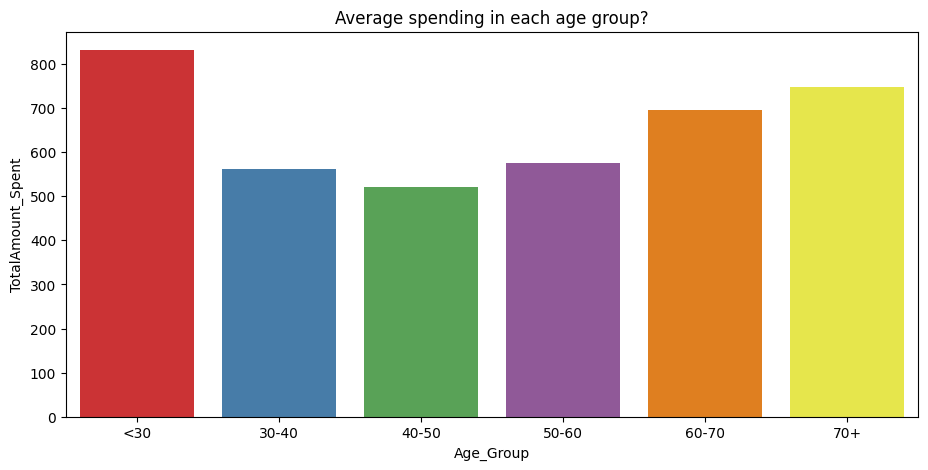

In [168]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 100], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
plt.figure(figsize = (11,5))
sns.barplot(df.groupby('Age_Group')['TotalAmount_Spent'].mean(), palette= 'Set1')
plt.title("Average spending in each age group?")

**Which products are performing best, and which are performing the least in terms of 
revenue? Analyze the data and plot a suitable graph to display a report on revenue 
generated by different products**

C:\Users\DELL\AppData\Local\Temp\ipykernel_15364\962346002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_revenue_per_product.index, y=total_revenue_per_product.values, palette='viridis')


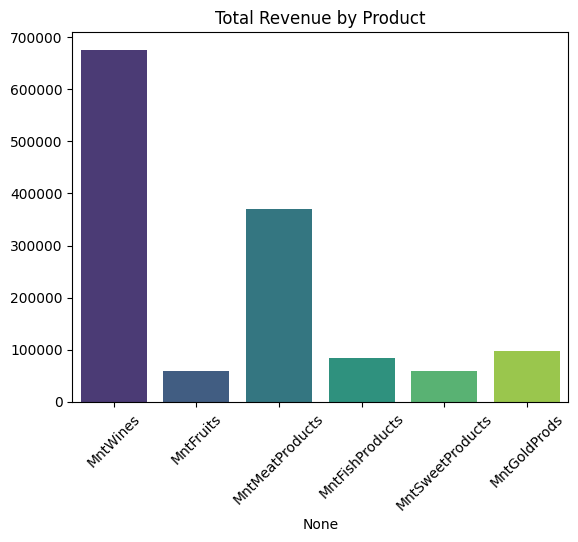

In [169]:
total_revenue_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
sns.barplot(x=total_revenue_per_product.index, y=total_revenue_per_product.values, palette='viridis')
plt.title('Total Revenue by Product')
plt.xticks(rotation=45)
plt.show()


**Which Country has the greatest number of customers who accepted the last campaign.**

C:\Users\DELL\AppData\Local\Temp\ipykernel_15364\3154717589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Count', data=country_response, palette='crest')


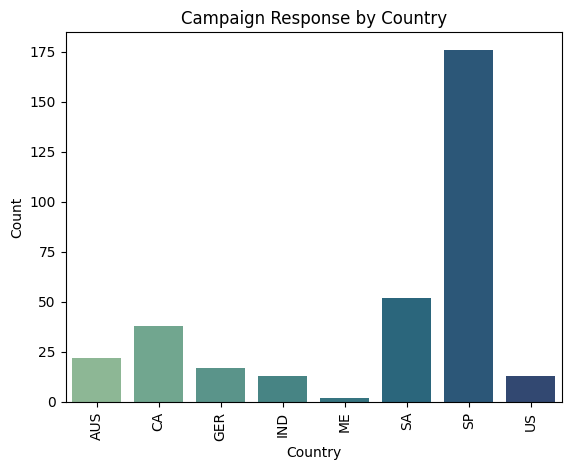

In [170]:
country_response = df[df['Response'] == 1].groupby('Country')['Response'].count().reset_index(name='Count')
sns.barplot(x='Country', y='Count', data=country_response, palette='crest')
plt.title('Campaign Response by Country')
plt.xticks(rotation=90)
plt.show()
